In [ ]:
'''Interview Questions:
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
--->Common Hyperparameters of Decision Trees and Their Impact
criterion (gini or entropy): Determines the function used to measure the quality of splits. gini is faster, while entropy provides a more information-theoretic approach.
max_depth: Limits the depth of the tree, preventing overfitting if set appropriately.
min_samples_split: Minimum number of samples required to split a node. Higher values lead to simpler trees.
min_samples_leaf: Minimum samples required in a leaf node. Prevents overfitting when set to a higher value.
max_features: Number of features to consider when looking for the best split. Controls variance and generalization.

2. What is the difference between the Label encoding and One-hot encoding?
--->Label Encoding: Converts categorical values into numeric labels (e.g., Red → 0, Green → 1).
Suitable for ordinal data but may introduce an unintended order in nominal data.
One-Hot Encoding: Converts categories into binary vectors (e.g., Red → [1,0,0], Green → [0,1,0]). 
Prevents the model from assuming a hierarchy but increases dimensionality.

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,roc_auc_score



# Load dataset
df = pd.read_excel(r"C:\Users\Asad shaikh\Documents\heart_disease.xlsx",sheet_name='Heart_disease')
# Display basic info
print(df.info())
print(df.describe())

# Check column names
print("Columns:", df.columns)

# Handling missing values
df = df.dropna()

# Convert boolean columns to integers
for col in df.select_dtypes(include=['bool']).columns:
    df[col] = df[col].astype(int)

# Identify target column (assuming it's named 'target' or similar)
target_column = 'target' if 'target' in df.columns else df.columns[-1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB
None
              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811

In [93]:
# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str)  # Ensure all values are strings before encoding
    df[col] = le.fit_transform(df[col])

# Split features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [92]:
# Train Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5764705882352941
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78        80
           1       0.39      0.59      0.47        41
           2       0.43      0.43      0.43        14
           3       0.31      0.15      0.20        27
           4       0.67      0.25      0.36         8

    accuracy                           0.58       170
   macro avg       0.52      0.44      0.45       170
weighted avg       0.58      0.58      0.56       170

Confusion Matrix:
 [[62 14  1  2  1]
 [ 9 24  4  4  0]
 [ 3  4  6  1  0]
 [ 3 17  3  4  0]
 [ 2  2  0  2  2]]


In [91]:
# Handle ROC AUC Score for binary and multi-class cases
if len(np.unique(y_test)) > 2:
    print("ROC AUC Score:", roc_auc_score(y_test, y_prob, multi_class='ovr'))
else:
    print("ROC AUC Score:", roc_auc_score(y_test, y_prob[:, 1]))

# Hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


ROC AUC Score: 0.6590982882337582
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}


Optimized Accuracy: 0.5588235294117647


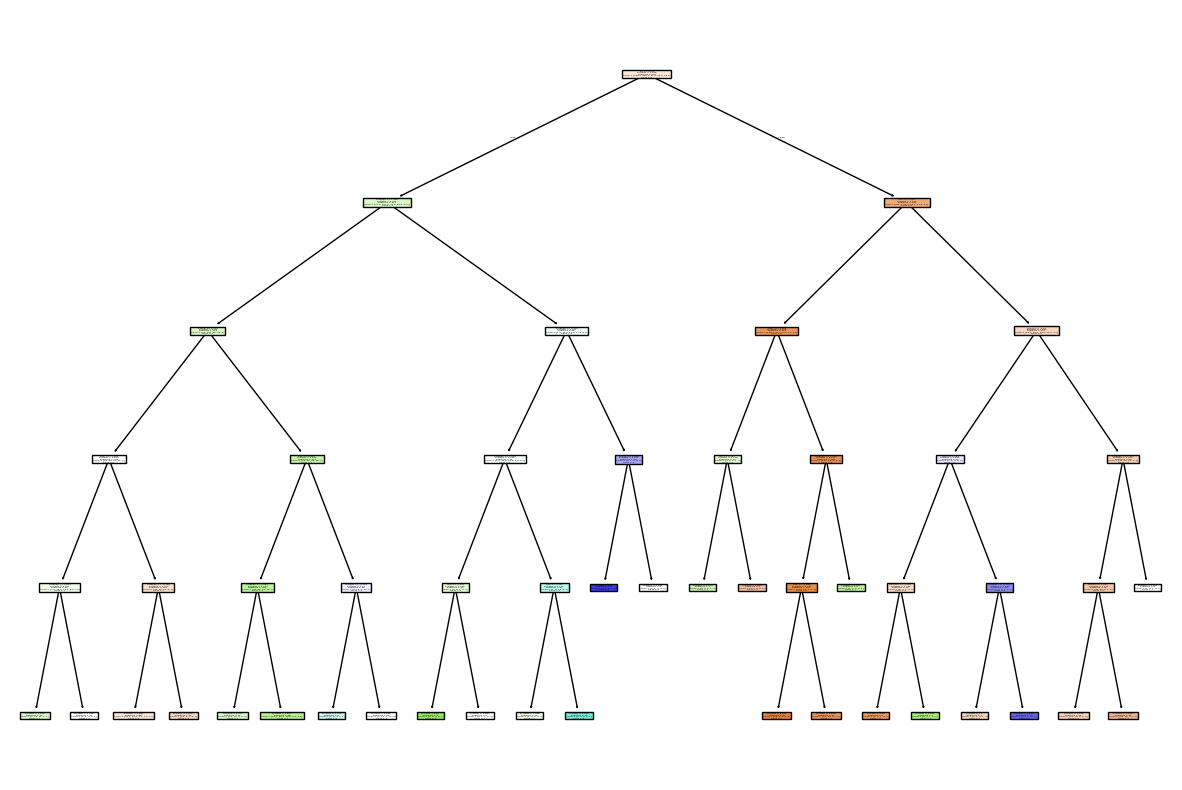

In [90]:
# Train optimized model
best_dt = grid_search.best_estimator_
best_dt.fit(X_train, y_train)
y_pred_opt = best_dt.predict(X_test)
print("Optimized Accuracy:", accuracy_score(y_test, y_pred_opt))

# Visualize Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(best_dt, feature_names=X.columns, class_names=[str(c) for c in np.unique(y)], filled=True)
plt.show()
